In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL25zaXJtcGlsYXR6ZS9Db2RlL05JVS9hbmltYWxzLWluLW1vdGlvbi9ib29r'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap.py": 1750062420.4195485, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap_external.py": 1750062420.422667, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/zipimport.py": 1750062418.968003, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/codecs.py": 1750062418.5286918, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/aliases.py": 1750062419.4695196, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/__init__.py": 1750062419.4666219, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/utf_8.py": 1750062419.879118, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/abc.py": 1750062418.4244814, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/io.py": 1750062418.692546, "/Users/nsi

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

from movement import sample_data
from movement.kinematics import compute_pairwise_distances, compute_speed
from movement.transforms import scale
from movement.utils.vector import compute_norm, convert_to_unit
from movement.utils.reports import report_nan_values

In [3]:
ds = sample_data.fetch_dataset("SLEAP_OSFM_zebras_drone.h5")
ds

<xarray.Dataset> Size: 7MB
Dimensions:      (time: 6294, space: 2, keypoints: 2, individuals: 44)
Coordinates:
  * time         (time) float64 50kB 0.0 0.03337 0.06673 ... 209.9 209.9 210.0
  * space        (space) <U1 8B 'x' 'y'
  * keypoints    (keypoints) <U1 8B 'H' 'T'
  * individuals  (individuals) <U8 1kB 'track_0' 'track_1' ... 'track_43'
Data variables:
    position     (time, space, keypoints, individuals) float32 4MB 1.035e+03 ...
    confidence   (time, keypoints, individuals) float32 2MB 0.9987 ... 1.006
Attributes:
    source_software:  SLEAP
    ds_type:          poses
    fps:              29.97
    time_unit:        seconds
    source_file:      /Users/nsirmpilatze/.movement/data/poses/SLEAP_OSFM_zeb...

In [4]:
body_vector = ds.position.sel(keypoints="H") - ds.position.sel(keypoints="T")

body_vector

<xarray.DataArray 'position' (time: 6294, space: 2, individuals: 44)> Size: 2MB
-20.64 -13.41 17.4 8.969 21.4 -4.405 ... -0.1141 3.393 4.625 19.86 8.691 -4.683
Coordinates:
  * time         (time) float64 50kB 0.0 0.03337 0.06673 ... 209.9 209.9 210.0
  * space        (space) <U1 8B 'x' 'y'
  * individuals  (individuals) <U8 1kB 'track_0' 'track_1' ... 'track_43'

In [5]:
# Compute body length per individual
body_length = compute_norm(body_vector)

In [6]:
print(report_nan_values(body_length))

Missing points (marked as NaN) in position:

individuals
track_0       234/6294 (3.72%)
track_1       286/6294 (4.54%)
track_10      614/6294 (9.76%)
track_11      369/6294 (5.86%)
track_12      519/6294 (8.25%)
track_13      420/6294 (6.67%)
track_14      353/6294 (5.61%)
track_15       434/6294 (6.9%)
track_16     827/6294 (13.14%)
track_17      241/6294 (3.83%)
track_18      483/6294 (7.67%)
track_19      196/6294 (3.11%)
track_2      645/6294 (10.25%)
track_20      557/6294 (8.85%)
track_21      576/6294 (9.15%)
track_22        88/6294 (1.4%)
track_23     633/6294 (10.06%)
track_24       85/6294 (1.35%)
track_25       43/6294 (0.68%)
track_26     813/6294 (12.92%)
track_27       315/6294 (5.0%)
track_28    1208/6294 (19.19%)
track_29      127/6294 (2.02%)
track_3       224/6294 (3.56%)
track_30      235/6294 (3.73%)
track_31       91/6294 (1.45%)
track_32        25/6294 (0.4%)
track_33      362/6294 (5.75%)
track_34       447/6294 (7.1%)
track_35     742/6294 (11.79%)
track_36     

In [7]:
# Compute basic statistics
body_length_std = body_length.std()
body_length_mean = body_length.mean()
body_length_median = body_length.median()

print(f"Body length mean: {body_length_mean:.2f} a.u.")  # a.u.: arbitrary units
print(f"Body length median: {body_length_median:.2f} a.u.")
print(f"Body length std: {body_length_std:.2f} a.u.")

Body length mean: 20.45 a.u.
Body length median: 20.43 a.u.
Body length std: 2.32 a.u.


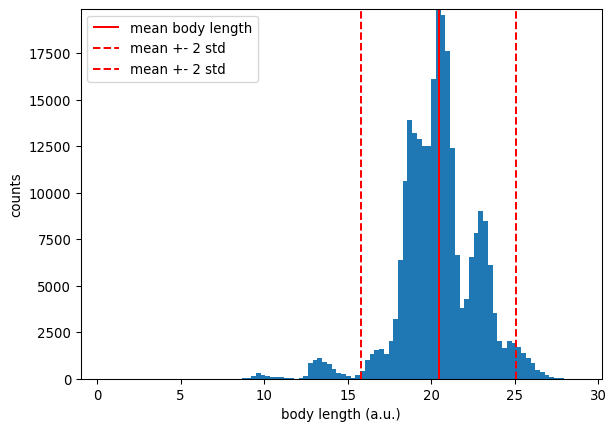

In [8]:
#| code-fold: true
#| label: fig-body-length-distribution
#| fig-cap: Distribution of zebra body lengths.

fig, ax = plt.subplots()

# plot histogram of body length values
counts, bins, _ = body_length.plot.hist(bins=100)

# add reference lines for mean and mean +- 2 stds
ax.vlines(
    body_length_mean,
    ymin=0,
    ymax=np.max(counts),
    color="red",
    linestyle="-",
    label="mean body length",
)
lower_bound = body_length_mean - 2 * body_length_std
upper_bound = body_length_mean + 2 * body_length_std
for bound in [lower_bound, upper_bound]:
    ax.vlines(
        bound,
        ymin=0,
        ymax=np.max(counts),
        color="red",
        linestyle="--",
        label="mean +- 2 std",
    )
ax.set_ylim(0, np.max(counts))
ax.set_xlabel("body length (a.u.)")
ax.set_ylabel("counts")
ax.legend()

In [9]:
body_vector_filtered = body_vector.where(
    np.logical_and(
        body_length <= body_length_mean + 2 * body_length_std,
        body_length >= body_length_mean - 2 * body_length_std,
    )
)

In [10]:
body_vector_filtered_unit = convert_to_unit(body_vector_filtered)

In [11]:
print(compute_norm(body_vector_filtered_unit)) 

<xarray.DataArray 'position' (time: 6294, individuals: 44)> Size: 1MB
1.0 nan 1.0 1.0 1.0 1.0 1.0 1.0 1.0 nan ... 1.0 1.0 nan 1.0 1.0 1.0 1.0 1.0 1.0
Coordinates:
  * time         (time) float64 50kB 0.0 0.03337 0.06673 ... 209.9 209.9 210.0
  * individuals  (individuals) <U8 1kB 'track_0' 'track_1' ... 'track_43'


In [12]:
herd_vector = body_vector_filtered_unit.mean("individuals")
print(herd_vector) 

<xarray.DataArray 'position' (time: 6294, space: 2)> Size: 50kB
0.5835 -0.4923 0.5589 -0.4968 0.5252 ... 0.4129 0.3367 0.4131 0.3156 0.4332
Coordinates:
  * time     (time) float64 50kB 0.0 0.03337 0.06673 ... 209.9 209.9 210.0
  * space    (space) <U1 8B 'x' 'y'


In [13]:
polarization = compute_norm(herd_vector)

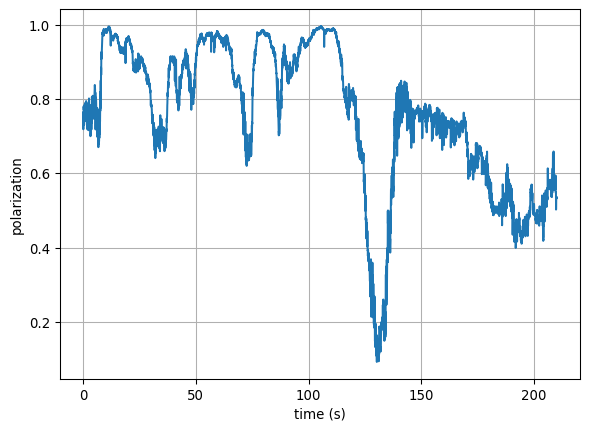

In [14]:
fig, ax = plt.subplots()
ax.plot(herd_vector.time, polarization)
ax.set_ylabel("polarization")
ax.set_xlabel("time (s)")
ax.grid()

In [15]:
position_scaled = scale(
    ds.position, 
    factor=1 / body_length_median.item(), 
    space_unit="body_length",
)

In [16]:
centroid = position_scaled.mean("keypoints")

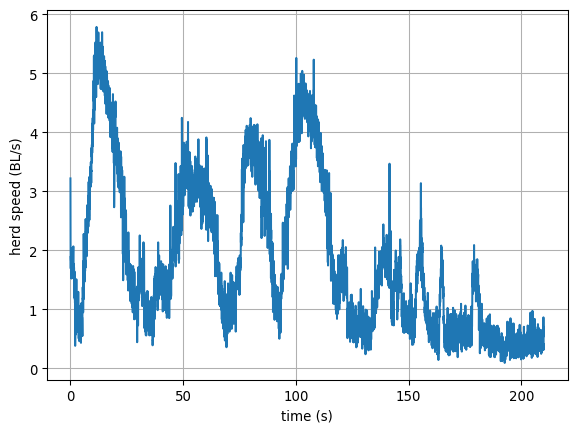

In [17]:
# Compute speed of each zebra's centroid
centroid_speed = compute_speed(centroid)

# Compute the average speed across all individuals
herd_speed = centroid_speed.mean("individuals")

# Plot the evolution of the herd speed over time
fig, ax = plt.subplots()
ax.plot(herd_speed.time, herd_speed)
ax.set_ylabel("herd speed (BL/s)")
ax.set_xlabel("time (s)")
ax.grid()

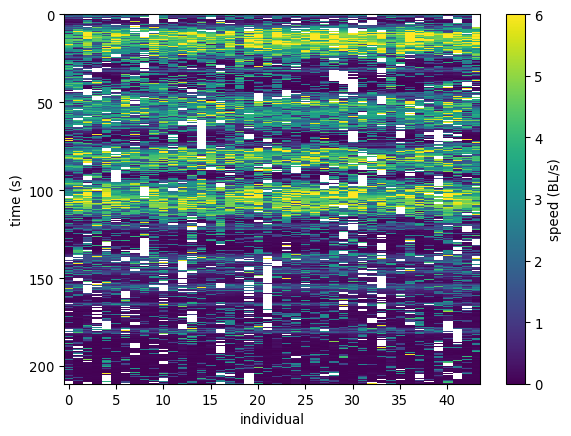

In [18]:
fig, ax = plt.subplots()
im = ax.matshow(
    centroid_speed,
    aspect="auto",
    cmap="viridis",
)

# convert frames to seconds in y-axis
time_ticks_step = 1498
time_ticks = np.arange(0, len(centroid_speed.time), time_ticks_step) 
time_labels = [f"{t:.0f}" for t in centroid_speed.time.values[0:-1:time_ticks_step]]
ax.set_yticks(time_ticks)
ax.set_yticklabels(time_labels)
ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)

ax.set_xlabel("individual")
ax.set_ylabel("time (s)") 

# add colorbar
cbar = plt.colorbar(im)
cbar.set_label("speed (BL/s)")
ax.get_images()[0].set_clim(0, 6) # cap values at 6 BL/s

In [19]:
log10_herd_speed = np.log10(herd_speed)

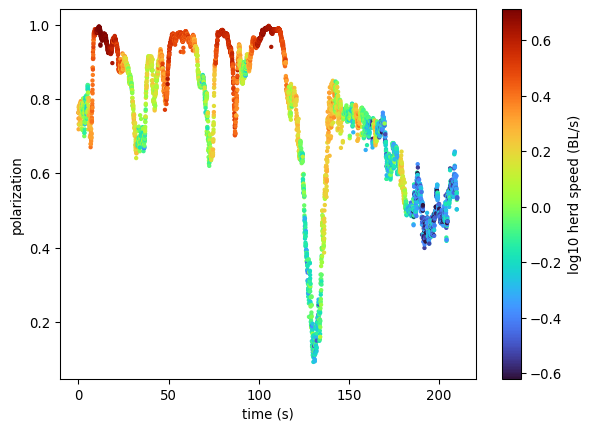

In [20]:
fig, ax = plt.subplots()
sc = ax.scatter(
    x=polarization.time,
    y=polarization,
    c=log10_herd_speed,
    s=5,
    cmap="turbo",
    # rescale color map to 1st and 99th percentiles
    vmin=log10_herd_speed.quantile(0.01).item(),
    vmax=log10_herd_speed.quantile(0.99).item(),
)


ax.set_xlabel("time (s)")
ax.set_ylabel("polarization")

cbar = plt.colorbar(sc)
cbar.set_label("log10 herd speed (BL/s)")